In [895]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [896]:
df = pd.read_csv('Housing_Price_Data.csv')

In [897]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [898]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [899]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [900]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [901]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Renombrar columnas

In [902]:
#renombrar columnas
df = df.rename(columns={'price': 'Precio', 'area': 'Area', 'bedrooms': 'Habitaciones', 'bathrooms': 'Baños', 'stories': 'Pisos', 'mainroad': 'CallePrincipal', 'guestroom': 'HabitacionInvitados', 'basement': 'Sotano', 'hotwaterheating': 'CalefaccionAguaCaliente', 'airconditioning': 'AireAcondicionado', 'parking': 'Estacionamiento', 'prefarea': 'AreaPreferida', 'furnishingstatus': 'EstadoAmueblado'})

In [903]:
#Identificar columnas de un solo valor
df.nunique()

Precio                     219
Area                       284
Habitaciones                 6
Baños                        4
Pisos                        4
CallePrincipal               2
HabitacionInvitados          2
Sotano                       2
CalefaccionAguaCaliente      2
AireAcondicionado            2
Estacionamiento              4
AreaPreferida                2
EstadoAmueblado              3
dtype: int64

In [904]:
#ver columnas de tipo numero
df.select_dtypes(include=[np.number]).columns
#calcular varianza de estas columnas
df.select_dtypes(include=[np.number]).var()

Precio             3.498544e+12
Area               4.709512e+06
Habitaciones       5.447383e-01
Baños              2.524757e-01
Pisos              7.525432e-01
Estacionamiento    7.423300e-01
dtype: float64

In [905]:
#Eliminar datos duplicados
df = df.drop_duplicates()

In [906]:
#Eliminar datos faltantes
df = df.dropna()

In [907]:
df.describe()

,Precio,Area,Habitaciones,Baños,Pisos,Estacionamiento
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: title={'center': 'Boxplots del precio'}, xlabel='Precio', ylabel='Valores'>

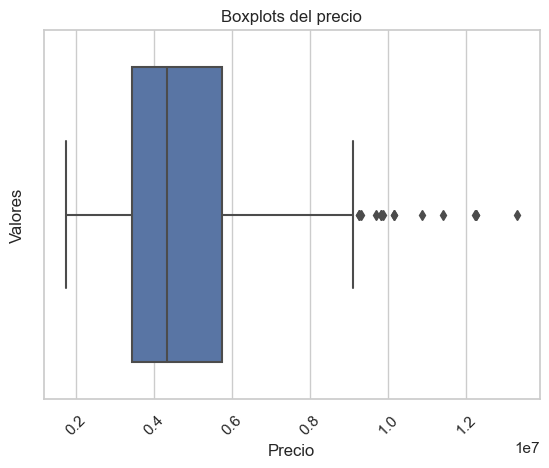

In [908]:
plt.title('Boxplots del precio')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)#graficar outliers
sns.boxplot(x=df['Precio'])

<Axes: title={'center': 'Boxplots del area'}, xlabel='Area', ylabel='Valores'>

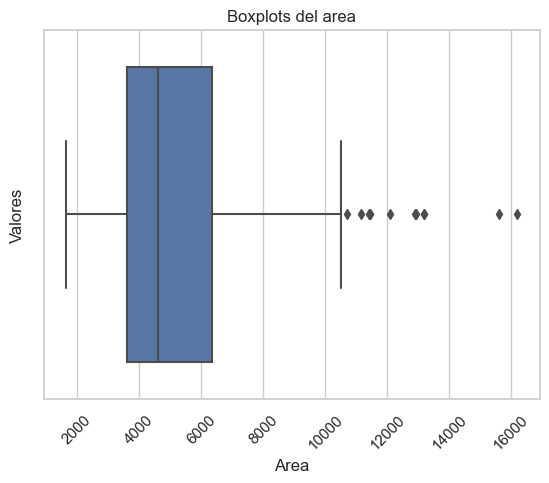

In [909]:
plt.title('Boxplots del area')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
sns.boxplot(x=df['Area'])

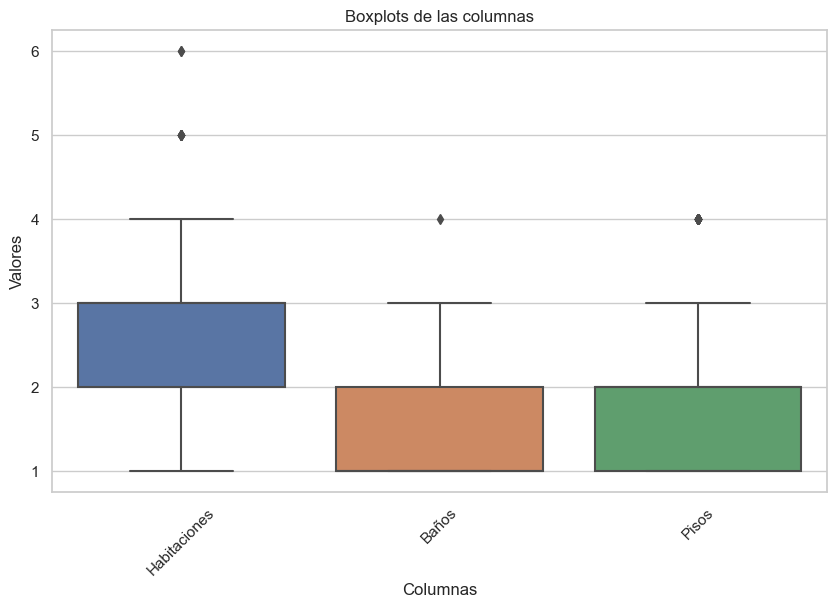

In [910]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Habitaciones', 'Baños', 'Pisos']])
plt.title('Boxplots de las columnas')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

In [911]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1
multiplier = 1.5

lower_limit = Q1 - multiplier * IQR
upper_limit = Q3 + multiplier * IQR

outliers = (df[numeric_columns] < lower_limit) | (df[numeric_columns] > upper_limit)

df = df[~outliers.any(axis=1, skipna=False)]

# Verificar el DataFrame sin outliers
df.head()

,Precio,Area,Habitaciones,Baños,Pisos,CallePrincipal,HabitacionInvitados,Sotano,CalefaccionAguaCaliente,AireAcondicionado,Estacionamiento,AreaPreferida,EstadoAmueblado
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished


In [912]:
print("Shape of DataFrame without outliers:", df.shape)

Shape of DataFrame without outliers: (463, 13)


<Axes: title={'center': 'Boxplots del precio'}, xlabel='Precio', ylabel='Valores'>

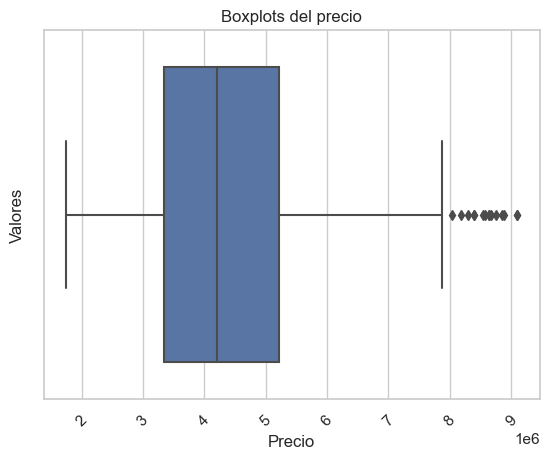

In [913]:
plt.title('Boxplots del precio')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)#graficar outliers
sns.boxplot(x=df['Precio'])

<Axes: title={'center': 'Boxplots del area'}, xlabel='Area', ylabel='Valores'>

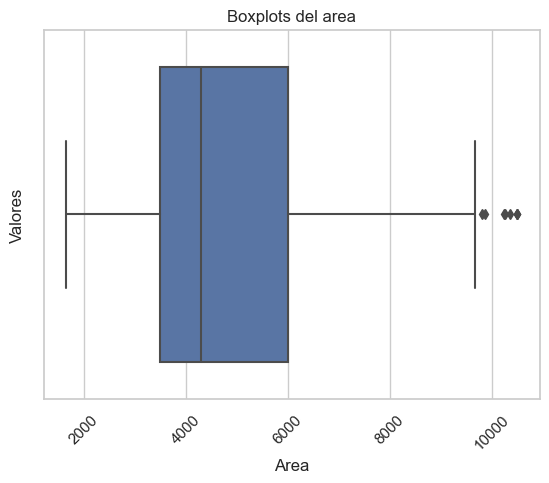

In [914]:
plt.title('Boxplots del area')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
sns.boxplot(x=df['Area'])

C:\Users\Martín Bravo Sáez\AppData\Local\Temp\ipykernel_29752\307193114.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Precio'], shade=True)


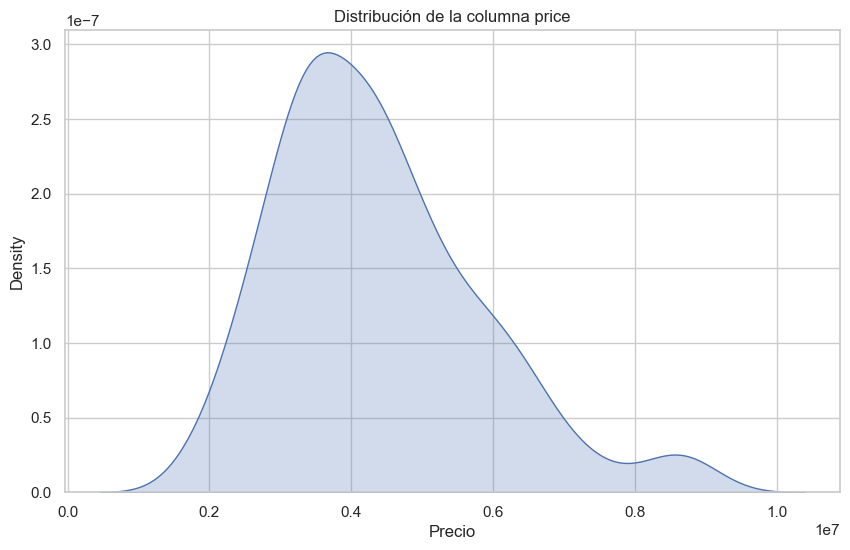

In [915]:
#Visualizar la distribución de las columnas con kde
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Precio'], shade=True)
plt.title('Distribución de la columna price')
plt.show()

C:\Users\Martín Bravo Sáez\AppData\Local\Temp\ipykernel_29752\2160751541.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Area'], shade=True)


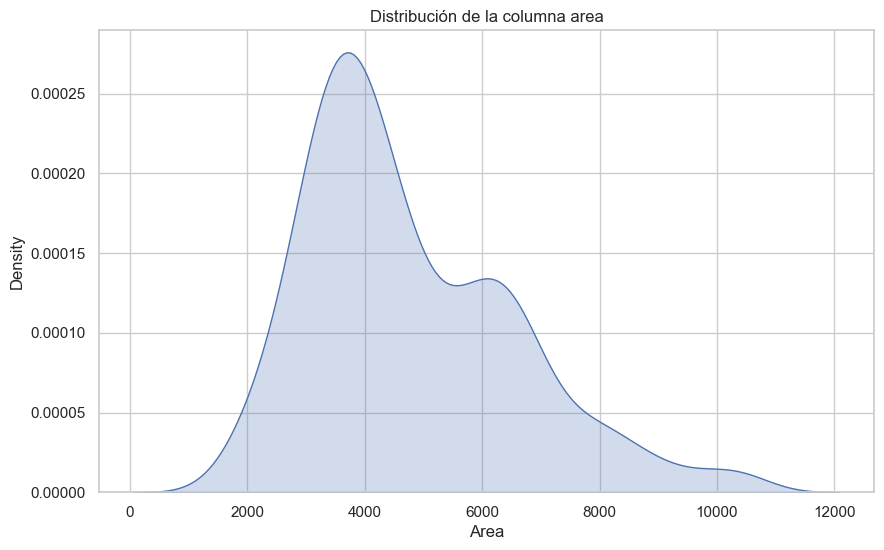

In [916]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Area'], shade=True)
plt.title('Distribución de la columna area')
plt.show()

# Modeling & Evaluation

In [917]:
#Split-out validation dataset
from sklearn.model_selection import train_test_split

X = df.drop('Precio', axis=1)
y = df['Precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (370, 12)
X_test shape: (93, 12)
y_train shape: (370,)
y_test shape: (93,)


In [918]:
print(X_train.dtypes)

Area                        int64
Habitaciones                int64
Baños                       int64
Pisos                       int64
CallePrincipal             object
HabitacionInvitados        object
Sotano                     object
CalefaccionAguaCaliente    object
AireAcondicionado          object
Estacionamiento             int64
AreaPreferida              object
EstadoAmueblado            object
dtype: object


In [919]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
import pandas as pd

# Supongamos que 'X_train', 'X_test', 'y_train' y 'y_test' ya están definidos

# Definir columnas que requieren codificación
columnas_codificar_label = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                            'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación con LabelEncoder para el conjunto de entrenamiento y prueba
label_encoder = LabelEncoder()
for columna in columnas_codificar_label:
    X_train[columna] = label_encoder.fit_transform(X_train[columna])
    X_test[columna] = label_encoder.transform(X_test[columna])

# Definir columnas que requieren codificación ordinal
columnas_codificar_ordinal = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                               'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación ordinal para el conjunto de entrenamiento y prueba
ordinal_encoder = OrdinalEncoder()
X_train[columnas_codificar_ordinal] = ordinal_encoder.fit_transform(X_train[columnas_codificar_ordinal])
X_test[columnas_codificar_ordinal] = ordinal_encoder.transform(X_test[columnas_codificar_ordinal])

# Normalización de todas las características en el conjunto de entrenamiento
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)

# Normalización de todas las características en el conjunto de prueba (usando el mismo escalador)
X_test_normalized = scaler_minmax.transform(X_test)
X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Verificar los cambios en el conjunto de entrenamiento
print("Train Data:")
X_train.head()

Train Data:


,Area,Habitaciones,Baños,Pisos,CallePrincipal,HabitacionInvitados,Sotano,CalefaccionAguaCaliente,AireAcondicionado,Estacionamiento,AreaPreferida,EstadoAmueblado
0,0.261017,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.172881,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5
2,0.561017,1.000000,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,0.0,0.5
3,0.254237,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.414689,0.666667,0.0,0.5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5


In [920]:
#Dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original shape of X_train:", X_train.shape)
print("Reduced shape of X_train:", X_train_pca.shape)


Original shape of X_train: (370, 12)
Reduced shape of X_train: (370, 10)


In [921]:
#Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Original shape of X_train:", X_train.shape)
print("Selected shape of X_train:", X_train_selected.shape)

Original shape of X_train: (370, 12)
Selected shape of X_train: (370, 5)


In [922]:
#Modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2:", r2)

Mean Squared Error: 1034207650903.9178
R^2: 0.6027730242561604


In [923]:
# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.021505376344086023


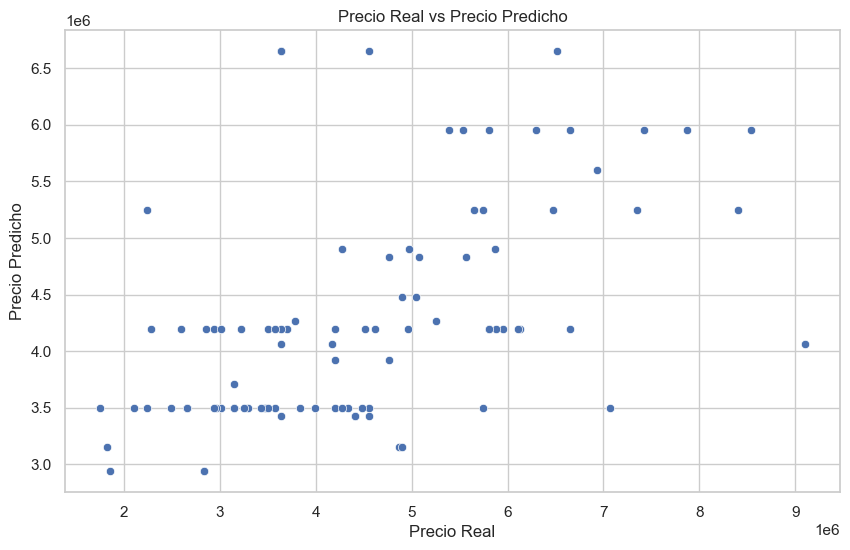

In [924]:
# Chequea linealidad entre Xs e Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs Precio Predicho')
plt.show()

LR: 0.577481 (0.074958)
LR: 0.266895 (0.177674)


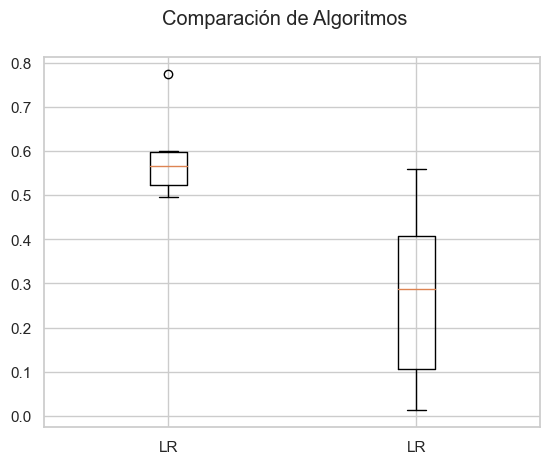

In [925]:
# Compare Algorithms
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Preparar los modelos
modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LR', LogisticRegression()))

# Evaluar cada modelo en turno
resultados = []
nombres = []

for nombre, modelo in modelos:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='r2')
    resultados.append(cv_results)
    nombres.append(nombre)
    mensaje = "%s: %f (%f)" % (nombre, cv_results.mean(), cv_results.std())
    print(mensaje)
    
# Comparar algoritmos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

In [926]:
# Improve metric--> adding new features (Feature engineering
df['TotalRooms'] = df['Habitaciones'] + df['Baños']

# Split-out validation dataset
X = df.drop('Precio', axis=1)
y = df['Precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columnas_codificar_label = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                            'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación con LabelEncoder para el conjunto de entrenamiento y prueba
label_encoder = LabelEncoder()
for columna in columnas_codificar_label:
    X_train[columna] = label_encoder.fit_transform(X_train[columna])
    X_test[columna] = label_encoder.transform(X_test[columna])

# Definir columnas que requieren codificación ordinal
columnas_codificar_ordinal = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                               'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación ordinal para el conjunto de entrenamiento y prueba
ordinal_encoder = OrdinalEncoder()
X_train[columnas_codificar_ordinal] = ordinal_encoder.fit_transform(X_train[columnas_codificar_ordinal])
X_test[columnas_codificar_ordinal] = ordinal_encoder.transform(X_test[columnas_codificar_ordinal])

# Normalización de todas las características en el conjunto de entrenamiento
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)

# Normalización de todas las características en el conjunto de prueba (usando el mismo escalador)
X_test_normalized = scaler_minmax.transform(X_test)
X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2:", r2)

Mean Squared Error: 1034207650903.9166
R^2: 0.602773024256161


In [927]:
#Select k best features
selector = SelectKBest(score_func=f_regression, k=5)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Original shape of X_train:", X_train.shape)
print("Selected shape of X_train:", X_train_selected.shape)

Original shape of X_train: (370, 13)
Selected shape of X_train: (370, 5)


In [928]:
#Modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2:", r2)

Mean Squared Error: 1034207650903.9166
R^2: 0.602773024256161
